# Exploración EDA - Spotify Churn Dataset
## Análisis Completo: Descargar → Explorar → Guardar en Parquet

Este notebook es **completamente autónomo**:
1. Descarga automáticamente el dataset de Kaggle si no existe
2. Realiza la exploración inicial (EDA)
3. Guarda el dataset en formato Parquet para uso posterior

In [14]:
import os
from pathlib import Path
import subprocess
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Helper para mejorar la visualización de secciones
def print_section(title):
    print(f'\n▶ {title}')
    print(f'  {"-" * (len(title) + 2)}')

In [16]:
# Configurar rutas y descargar dataset si no existe
data_dir = Path('data')
data_dir.mkdir(parents=True, exist_ok=True)
parquet_path = data_dir / 'spotify_churn.parquet'
csv_path = data_dir / 'spotify_churn_dataset.csv'

# Verificar si el parquet ya existe
if parquet_path.exists():
    print(f'✓ Parquet encontrado: {parquet_path}')
    df = pd.read_parquet(parquet_path)
    print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')

elif csv_path.exists():
    print(f'✓ CSV encontrado: {csv_path}')
    # Crear parquet a partir del CSV
    temp_df = pd.read_csv(csv_path)
    temp_df.to_parquet(parquet_path, index=False)
    print(f'  Parquet creado en: {parquet_path}')

    # Siempre cargamos desde parquet
    df = pd.read_parquet(parquet_path)
    print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')

else:
    print('Descargando dataset de Kaggle...')
    try:
        import kaggle
    except ImportError:
        print('  Instalando kaggle...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'kaggle', '-q'])
    
    # Descargar dataset
    try:
        os.system(
            f'kaggle datasets download -d nabihazahid/spotify-dataset-for-churn-analysis '
            f'-p {data_dir} --unzip'
        )
        print('✓ Dataset descargado exitosamente')
        
        # Buscar archivo CSV descargado
        csvs = list(data_dir.glob('*.csv'))
        if csvs:
            csv_path = csvs[0]
            print(f'  CSV encontrado: {csv_path}')
            # Crear parquet a partir del CSV
            temp_df = pd.read_csv(csv_path)
            temp_df.to_parquet(parquet_path, index=False)
            print(f'  Parquet creado en: {parquet_path}')

            # Siempre cargamos desde parquet
            df = pd.read_parquet(parquet_path)
            print(f'  Dataset cargado desde parquet: {df.shape[0]} filas, {df.shape[1]} columnas')
        else:
            raise FileNotFoundError('No se encontró CSV después de descargar')
    except Exception as e:
        print(f'❌ Error al descargar desde Kaggle: {e}')
        print('\n⚠️ Solución: Asegúrese de:')
        print('   1. Tener credentials de Kaggle en ~/.kaggle/kaggle.json')
        print('   2. Ejecutar: kaggle datasets download -d nabihazahid/spotify-dataset-for-churn-analysis -p data --unzip')
        raise


Descargando dataset de Kaggle...
  Instalando kaggle...
✓ Dataset descargado exitosamente
  CSV encontrado: data\spotify_churn_dataset.csv
  Parquet creado en: data\spotify_churn.parquet
  Dataset cargado desde parquet: 8000 filas, 12 columnas
✓ Dataset descargado exitosamente
  CSV encontrado: data\spotify_churn_dataset.csv
  Parquet creado en: data\spotify_churn.parquet
  Dataset cargado desde parquet: 8000 filas, 12 columnas


In [ ]:
# Información básica
print_section('RESUMEN DEL DATASET')
print(f'Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas')
print(f'Memoria: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB')
print()
print('Tipos de datos:')
print(df.dtypes)
print()
print('Valores nulos:')
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print('  ✓ Sin valores nulos - Dataset limpio')
else:
    print(null_counts[null_counts > 0])


▶ RESUMEN DEL DATASET
  ---------------------
Dimensiones: 8000 filas × 12 columnas
Memoria: 2.12 MB

Tipos de datos:
user_id                    int64
gender                    object
age                        int64
country                   object
subscription_type         object
listening_time             int64
songs_played_per_day       int64
skip_rate                float64
device_type               object
ads_listened_per_week      int64
offline_listening          int64
is_churned                 int64
dtype: object

Valores nulos:
  ✓ Sin valores nulos - Dataset limpio


In [18]:
# Estadísticas descriptivas
print_section('ESTADÍSTICAS DESCRIPTIVAS')
display(df.describe(include='all'))


▶ ESTADÍSTICAS DESCRIPTIVAS
  ---------------------------


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000,8000.000000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000.000000,8000.000000,8000.000000
unique,NaN,3,NaN,8,4,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,Male,NaN,AU,Premium,NaN,NaN,NaN,Desktop,NaN,NaN,NaN
freq,NaN,2691,NaN,1034,2115,NaN,NaN,NaN,2778,NaN,NaN,NaN
mean,4000.50000,NaN,37.662125,NaN,NaN,154.068250,50.127250,0.300127,NaN,6.943875,0.747750,0.258875
std,2309.54541,NaN,12.740359,NaN,NaN,84.015596,28.449762,0.173594,NaN,13.617953,0.434331,0.438044
min,1.00000,NaN,16.000000,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,2000.75000,NaN,26.000000,NaN,NaN,81.000000,25.000000,0.150000,NaN,0.000000,0.000000,0.000000
50%,4000.50000,NaN,38.000000,NaN,NaN,154.000000,50.000000,0.300000,NaN,0.000000,1.000000,0.000000
75%,6000.25000,NaN,49.000000,NaN,NaN,227.000000,75.000000,0.450000,NaN,5.000000,1.000000,1.000000


In [19]:
# Balance de la clase objetivo
print_section('BALANCE DE CLASE (is_churned)')
churned_counts = df['is_churned'].value_counts()
churned_pct = df['is_churned'].value_counts(normalize=True) * 100

for idx in churned_counts.index:
    label = 'Activo' if idx == 0 else 'Churn '
    bar_len = int(churned_pct[idx] / 5)
    bar = '█' * bar_len
    print(f'  {label:7} {bar:<20} {churned_pct[idx]:5.1f}% ({churned_counts[idx]:,})')

print(f'\n  Ratio de churn: {churned_pct[1]:.2f}%')


▶ BALANCE DE CLASE (is_churned)
  -------------------------------
  Activo  ██████████████        74.1% (5,929)
  Churn   █████                 25.9% (2,071)

  Ratio de churn: 25.89%


Vemos un dataset desbalanceado con más del **70% de meustras** pertenecientes a una clase. Vamos a manejar esto en el futuro, quizá utilizando `SMOTE` o algo similar.

In [20]:
# Variables categóricas
print_section('VARIABLES CATEGÓRICAS')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    print(f'\n  📊 {col}:')
    counts = df[col].value_counts()
    for val, count in counts.items():
        pct = (count / len(df)) * 100
        print(f'     {val:18} {count:5,} ({pct:5.1f}%)')


▶ VARIABLES CATEGÓRICAS
  -----------------------

  📊 gender:
     Male               2,691 ( 33.6%)
     Female             2,659 ( 33.2%)
     Other              2,650 ( 33.1%)

  📊 country:
     AU                 1,034 ( 12.9%)
     US                 1,032 ( 12.9%)
     DE                 1,015 ( 12.7%)
     IN                 1,011 ( 12.6%)
     PK                   999 ( 12.5%)
     FR                   989 ( 12.4%)
     UK                   966 ( 12.1%)
     CA                   954 ( 11.9%)

  📊 subscription_type:
     Premium            2,115 ( 26.4%)
     Free               2,018 ( 25.2%)
     Student            1,959 ( 24.5%)
     Family             1,908 ( 23.8%)

  📊 device_type:
     Desktop            2,778 ( 34.7%)
     Web                2,623 ( 32.8%)
     Mobile             2,599 ( 32.5%)



▶ MATRIZ DE CORRELACIÓN
  -----------------------
  Variables numéricas: 8

  Top correlaciones con is_churned:
     1. skip_rate                 ↗  0.0161
     2. offline_listening         ↗  0.0128
     3. songs_played_per_day      ↗  0.0093
     4. age                       ↗  0.0040
     5. ads_listened_per_week     ↘  0.0023
     6. listening_time            ↘  0.0076
     7. user_id                   ↘  0.0160

  ✓ Heatmap guardado en: data\correlation_matrix.png


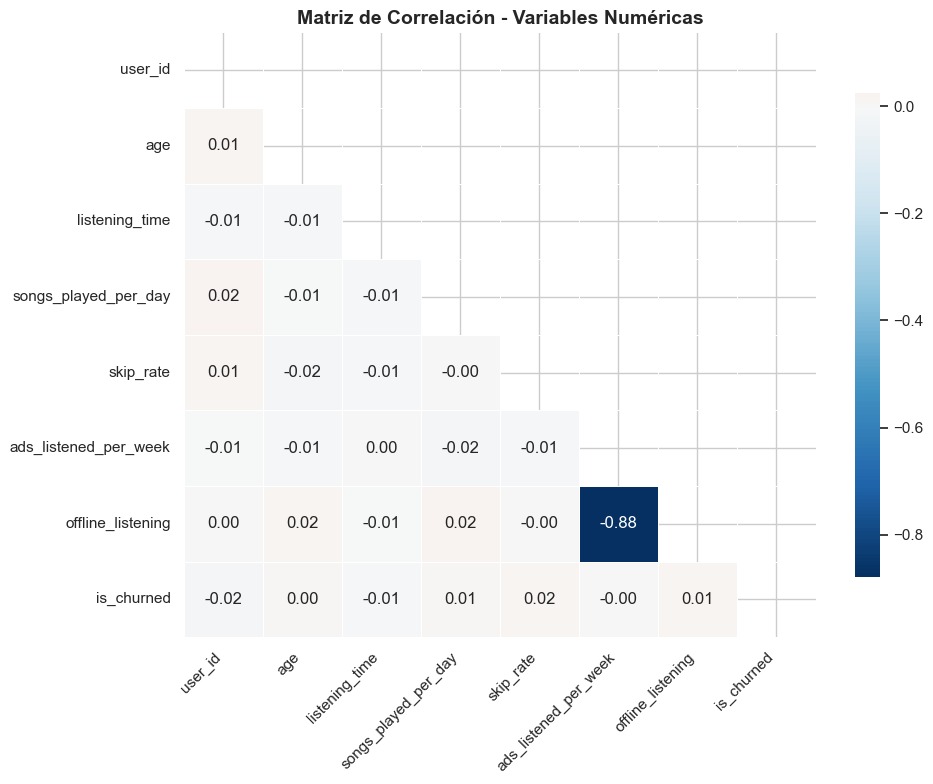

In [24]:
# Matriz de correlación (gráfica)
print_section('MATRIZ DE CORRELACIÓN')

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'  Variables numéricas: {len(num_cols)}')

# Calcular matriz de correlación
corr_matrix = df[num_cols].corr()

# Mostrar correlación numérica con is_churned (texto compacto)
print(f"\n  Top correlaciones con is_churned:")
churn_corr = corr_matrix['is_churned'].sort_values(ascending=False)
for i, (var, corr) in enumerate(churn_corr.items()):
    if var != 'is_churned':
        arrow = '↗' if corr > 0 else '↘'
        print(f"    {i:2}. {var:25} {arrow} {abs(corr):7.4f}")

# Gráfica: heatmap enmascarando la mitad superior para mayor legibilidad
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .8}, square=False)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Guardar figura
out_img = Path('data') / 'correlation_matrix.png'
plt.savefig(out_img, dpi=150)
print(f"\n  ✓ Heatmap guardado en: {out_img}")
plt.show()

- Podemos ver una **importante correlación** entre `ads_listened_per_week` y `offline_listening`. Esto se manejará en el futuro para modelos lineales aumentando así su resistencia a multicolinealidad.

- No consideramos que alguna correlación con `is_churned` sea significativa


▶ DISTRIBUCIONES DE VARIABLES NUMÉRICAS
  ---------------------------------------
  Generando visualizaciones...


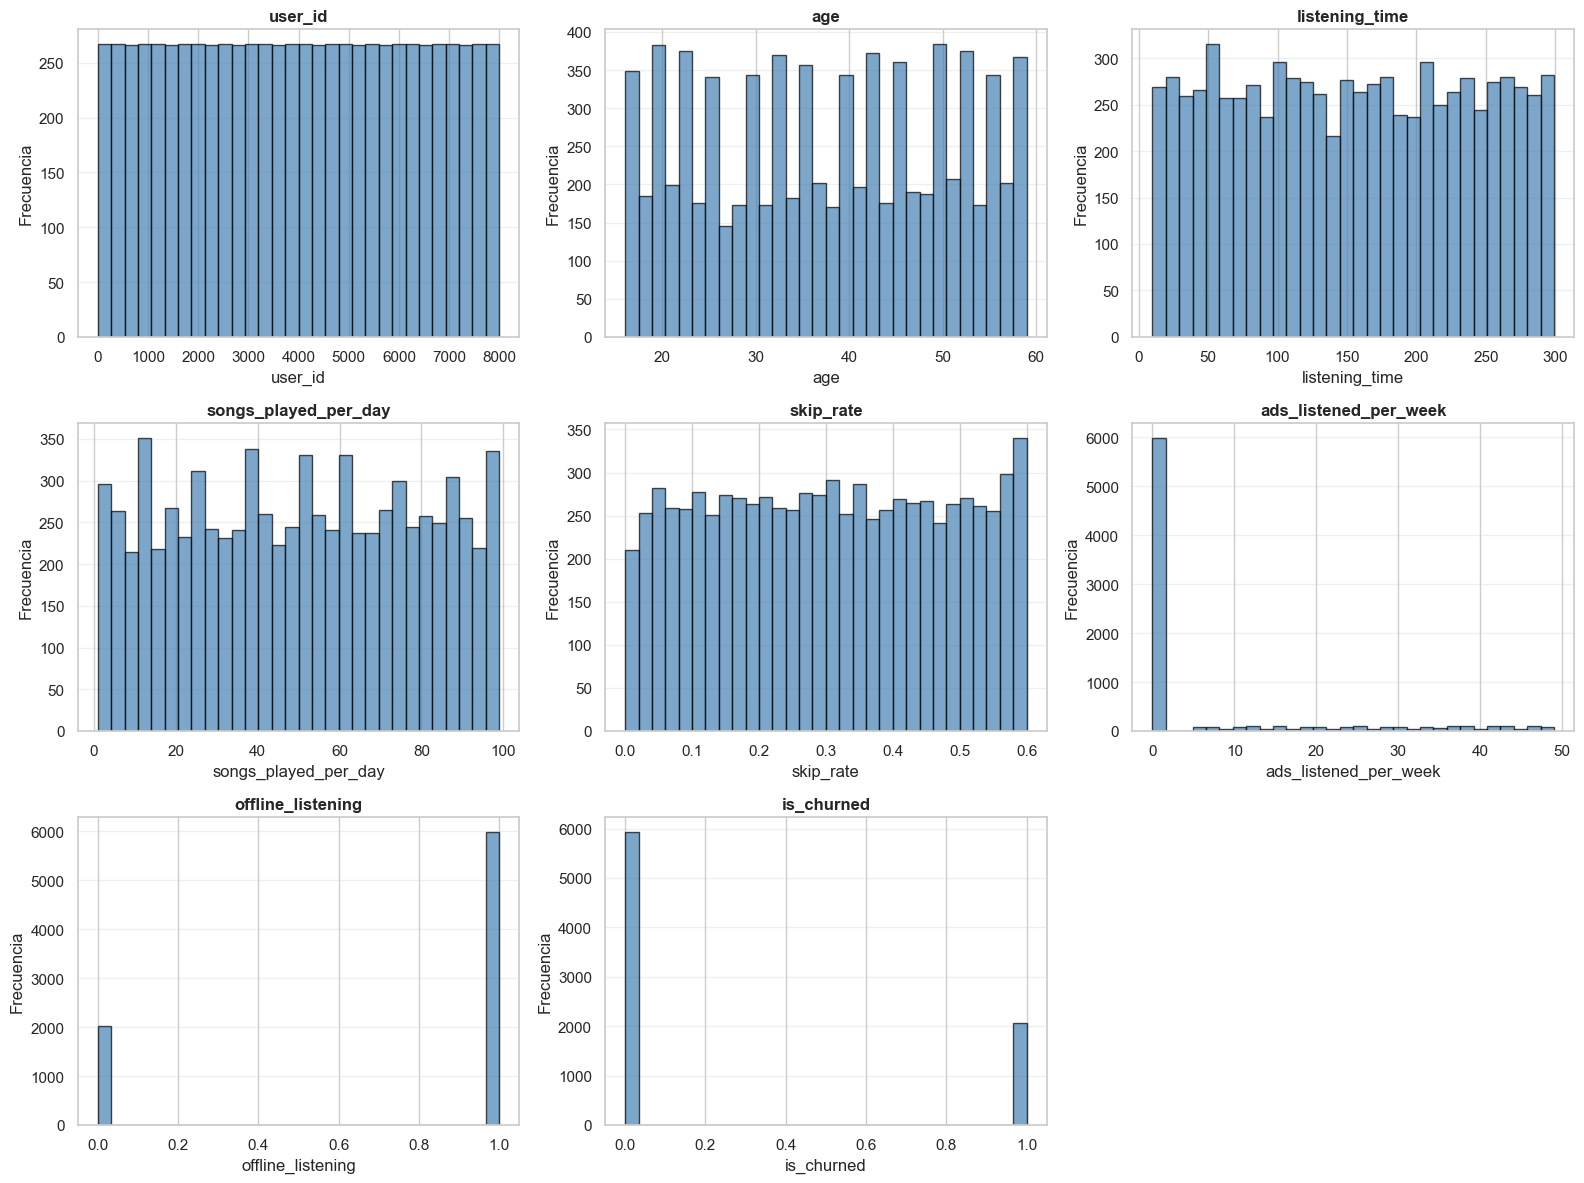

  ✓ Visualizaciones generadas


In [22]:
# Distribuciones
print_section('DISTRIBUCIONES DE VARIABLES NUMÉRICAS')
print('  Generando visualizaciones...')

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(axis='y', alpha=0.3)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print('  ✓ Visualizaciones generadas')